In [27]:
import numpy as np
import sys
sys.path.append("/Users/valerio/Documents/lab/Lab-Rydberg/dipolar_trap")
from lib import diptrap
import matplotlib.pyplot as plt
import scipy.constants as scc

In [28]:
T = 100 * 10**-6 # K
m = 1.41810133E-25 # kg
g = 9.8 # m/s^2

n_MOT = 2.5e16 # m^-3
v_mean = 0.1 # m/s
A = 3.9e-9 # m^2
P_trap = 0.1

R = (1/4) * n_MOT * v_mean * A * P_trap
R

243750.0

In [29]:
time = [-6,-2]
steps = 100
burst = 10**-time[-1]#0.0001#10**time[-1]-10**(time[-1]-5)

trunc = 300
R = 2.7e5# 7 # s-1
gamma = 1 # s^-1
beta = 7.5 # 0.1

v0 = np.zeros(trunc)
v0[0] = 1

my_trap_1 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_1")
my_trap_1.evolve(v0 = v0, time = time, steps = steps, burst_time=burst, scale="log")

In [30]:
# importing data

file = open("data.txt", "r")
Ns_au = []
dNs_au = []
ts_au = []

for line in file:
    row = line.split("\t")
    dat = list(map(float, row))
    ts_au.append(dat[0])
    Ns_au.append(dat[1])
    dNs_au.append(dat[-1])

sorted_indeces = sorted(range(len(ts_au)), key=lambda k: ts_au[k])

Ns_ = []
dNs_ = []
ts_ = []

for i in sorted_indeces:
    Ns_.append(Ns_au[i])
    dNs_.append(dNs_au[i])
    ts_.append(ts_au[i])

/Users/valerio/Documents/lab/Lab-Rydberg/dipolar_trap/lib/diptrap.py:288: RuntimeWarning: invalid value encountered in double_scalars
  Q = variance/mean - 1


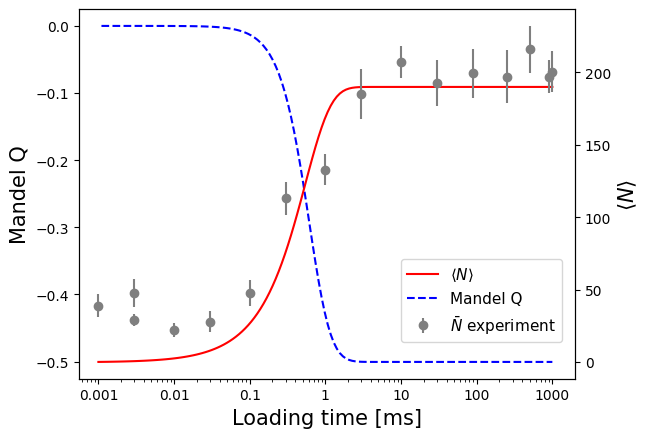

In [31]:
my_trap_1.plot_mandel_Q(scale="log")
scaling = 1/(0.21*0.43)

goods_ = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.errorbar(np.array(ts_)[goods_]*1e-3, np.array(Ns_)[goods_]*scaling, np.array(dNs_)[goods_]*scaling, marker="o",ls="", color="tab:gray", label=r"$\bar{N}$ experiment")
plt.legend(loc=(0.65,0.1),fontsize=11)
plt.xlabel("loading time [ms]", fontsize=13)
plt.xticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1], labels=["0.001", "0.01", "0.1", "1", "10", "100", "1000"])
plt.savefig('loading_eperiment_model.png', dpi=300)

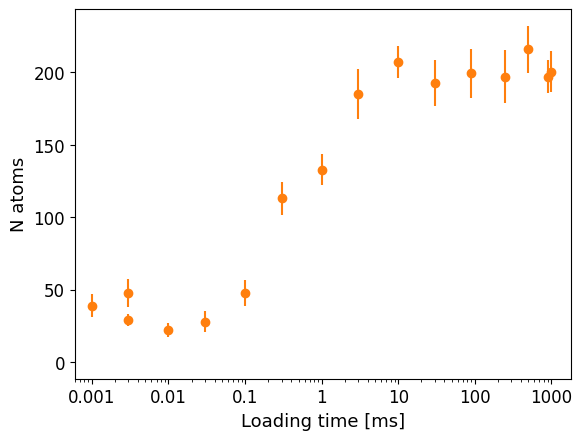

In [32]:
plt.errorbar(np.array(ts_), np.array(Ns_)*scaling, np.array(dNs_)*scaling, marker="o",ls="", color="tab:orange", label=r"$\langle N \rangle$ experiment")
plt.xlim([0.0006, 1800])
#plt.ylim([0,150])

plt.xscale("log")
plt.xlabel("Loading time [ms]", fontsize=13)
plt.ylabel("N atoms", fontsize=13)
plt.xticks([1e-3, 1e-2, 1e-1, 1e-0, 1e1, 1e2, 1000], labels=["0.001", "0.01", "0.1", "1", "10", "100", "1000"], fontsize=12)
plt.yticks([0,50,100,150,200], fontsize=12)
#plt.savefig('loading_eperiment.png', dpi=300)
plt.show()

[278.84172166  24.85781922] +- 52.07292499251906
chi2 =  12.241707340999584


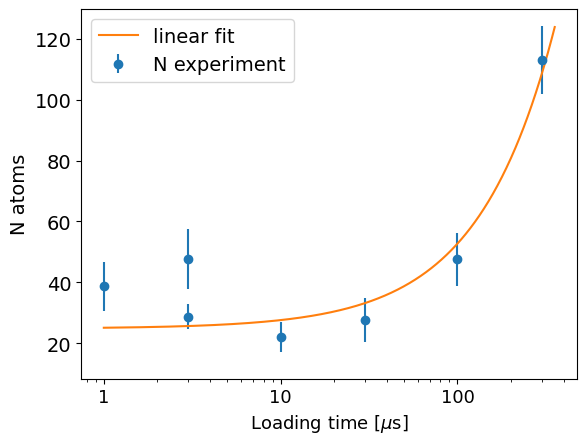

In [33]:
from scipy.optimize import curve_fit

def chisquare(func, x, data, sigmas):
    chi2 = 0
    for i in range(len(x)):
        chi2 += ((func(x[i])-data[i])/sigmas[i])**2
    return chi2

negs = []
dnegs = []
tes_n = []

sorted_indeces = sorted(range(len(ts_)), key=lambda k: ts_[k])

for i in sorted_indeces:
    if ts_[i] < 1000:
        negs.append(Ns_[i])
        dnegs.append(dNs_[i])
        tes_n.append(ts_[i])
    else:
        break

goods_ = [7,8,9,10,11,12,13,14]

plt.errorbar(np.array(tes_n)[goods_], np.array(negs)[goods_]*scaling, np.array(dnegs)[goods_]*scaling, marker="o",ls="", label="N experiment")

x = np.array(tes_n)[goods_]
y = np.array(negs)[goods_]*scaling
dy = np.array(dnegs)[goods_]*scaling

def line_(x, a, b):
    return a*x + b

res, cov = curve_fit(line_, x, y, sigma=dy)

print(res, "+-", np.sqrt(cov[0][0]))
x_fit = np.logspace(-3, -0.45, 1000)
y_fit = line_(x_fit, *res)
plt.plot(x_fit, y_fit, label="linear fit")

chi2 = chisquare(lambda k: line_(k, *res), x, y, dy)
print("chi2 = ", chi2 )


plt.xticks(ticks=[0.01, 0.1, 1], labels=["1","10","100"])
plt.xlabel(r"Loading time [$\mu$s]", fontsize=13)
plt.ylabel("N atoms", fontsize=14)
plt.yticks(fontsize=14)
plt.xscale("log")
plt.legend(fontsize=14)
plt.xticks([1e-3, 1e-2, 1e-1], labels=["1","10","100"], fontsize=13)
#plt.savefig('linear_fit_loading.png', dpi=300)
plt.show()

#plt.xlim([-0.01,0])


[31.30391517 39.62103197] +- 6.295498499666661
chi2 =  2.7098393001163807


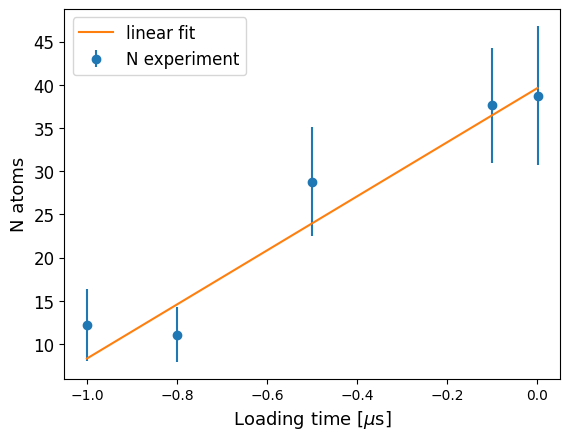

In [34]:
negs = []
dnegs = []
tes_n = []

sorted_indeces = sorted(range(len(ts_)), key=lambda k: ts_[k])

for i in sorted_indeces:
    if ts_[i] < 1000:
        negs.append(Ns_[i])
        dnegs.append(dNs_[i])
        tes_n.append(ts_[i])
    else:
        break

goods_ = [3,4,5,6,8]

plt.errorbar(np.array(tes_n)[goods_], np.array(negs)[goods_]*scaling, np.array(dnegs)[goods_]*scaling, marker="o",ls="", label="N experiment")

x = np.array(tes_n)[goods_]
y = np.array(negs)[goods_]*scaling
dy = np.array(dnegs)[goods_]*scaling

def line_(x, a, b):
    return a*x + b

res, cov = curve_fit(line_, x, y, sigma=dy)

print(res, "+-", np.sqrt(cov[0][0]))
x_fit = np.linspace(-1, 0, 1000)
y_fit = line_(x_fit, *res)
plt.plot(x_fit, y_fit, label="linear fit")

chi2 = chisquare(lambda k: line_(k, *res), x, y, dy)
print("chi2 = ", chi2 )


#plt.xticks(ticks=[0.01, 0.1, 1], labels=["1","10","100"])
plt.xlabel(r"Loading time [$\mu$s]", fontsize=13)
plt.ylabel("N atoms", fontsize=13)
plt.yticks(fontsize=12)
#plt.xscale("log")
plt.legend(loc=2,fontsize=12)
#plt.xticks([1e-3, 1e-2, 1e-1], labels=["1","10","100"], fontsize=12)
#plt.savefig('linear_fit_loading.png', dpi=300)
plt.show()

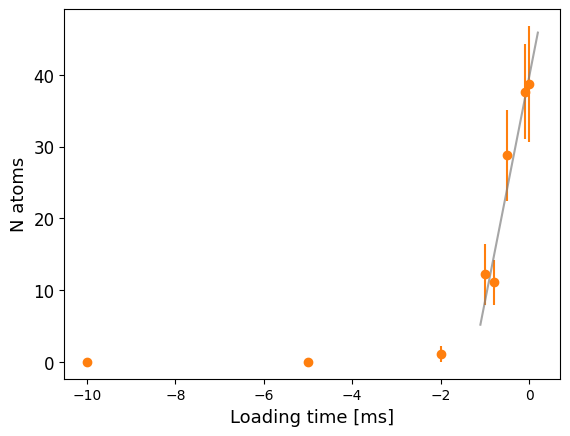

In [35]:
# negative loadings
goods_ = [0,1,2,3,4,5,6,8]

plt.errorbar(np.array(tes_n)[goods_], np.array(negs)[goods_]*scaling, np.array(dnegs)[goods_]*scaling, marker="o",ls="", color="tab:orange", label="N experiment")
x_fit = np.linspace(-1.1, 0.2, 1000)
y_fit = line_(x_fit, *res)
plt.plot(x_fit, y_fit, label="linear fit", color="gray", alpha=0.7)
plt.xlabel(r"Loading time [ms]", fontsize=13)
plt.ylabel("N atoms", fontsize=13)
plt.yticks(fontsize=12)
#plt.savefig('linear_fit_negative_loadings.png', dpi=300)
plt.show()


In [36]:
0.7**4 * 1000

240.09999999999997

In [37]:
240/(3**4)

2.962962962962963

In [38]:
K = 1.1*1e-10 
Ir =  0.16/(np.pi*1**2) * 1e-3 / (0.01**2) #0.05 * 1e-3
Im = 0.3/(np.pi*1**2) * 1e-3 / (0.01**2)
V = 6.82 * 1e-13

print(K * Ir * Im/ (V * (Ir + 0.2*Im)))

112.01520921423719


In [39]:
2*140e-3/(np.pi*5e-4**2) 

356507.0725258456

In [40]:
0.3/(np.pi*2**2)

0.0238732414637843

In [41]:
1/6

0.16666666666666666

In [42]:
2.7 * 10**5 / 200**2

6.75

In [43]:
Im

0.954929658551372

In [44]:
1.356*10**-9 / scc.cent**2 * Im

AttributeError: module 'scipy.constants' has no attribute 'cent'

In [ ]:
135e-3/(np.pi*5**2*10**-8) * 10**-3

171.88733853924697

In [ ]:
9*6+12 + 9 + 45

120

In [ ]:
(6.7/1000)**(1/4)*5e-6

1.4305027762881526e-06

In [45]:
1/10000

0.0001